# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Alireza Kheirandish
2.   Student Number: 97101604


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [187]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [188]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
train_counter = np.int(0.8*dataset.shape[0])
permutated = np.random.permutation(dataset.shape[0])
train = permutated[:train_counter]
test = permutated[train_counter:]
x_train = dataset['X'][train]
y_train = dataset['Y'][train]

x_test = dataset['X'][test]
y_test = dataset['Y'][test]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [189]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
b0 = (np.sum(y_train)*np.sum(x_train**2)-np.sum(x_train)*np.sum(x_train*y_train))/(train_counter*np.sum(x_train**2)-np.sum(x_train)**2)
b1 = (train_counter*np.sum(x_train*y_train)-np.sum(y_train)*np.sum(x_train))/(train_counter*np.sum(x_train**2)-np.sum(x_train)**2)
m = [b1, b0]

In [190]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.linalg.norm(y_train-predicted_train_y)**2 / y_train.shape[0]
test_error = np.linalg.norm(y_test-predicted_test_y)**2 / y_test.shape[0]

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.33331076330911175
MSE test error: 0.3203445253131877


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

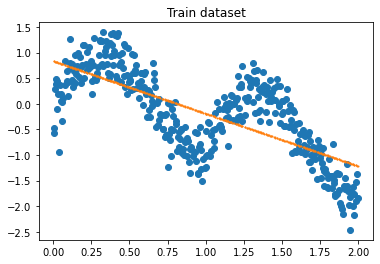

In [191]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

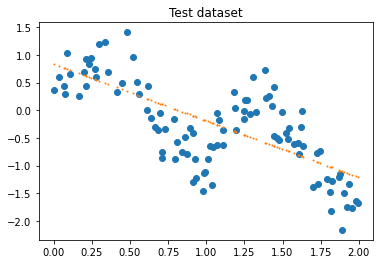

In [192]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

No 

This line minimize the error of line points and dataset in the space of line functions

In this view, I guess a polynomial with degree of four is appropriate

the main problem here is that our function is not purely linear, and the best linear function we can allign is a picewise linear function

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

yes, we can approximate every function with picewise linear function. Here we have a smooth function that seems created from 3 lines.


### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [193]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/(-2 * hyperparameter ** 2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [194]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    train_X = np.mat(train_X).T
    train_Y = np.mat(train_Y).T
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.pinv(X.T*(W * X))*(X.T*(W * train_Y)) 
    

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [196]:
hyperparameter = 0.05
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = np.linalg.norm(np.mat(np.array(predicted_test))-np.mat(y_test)) / np.mat(y_test).shape[1]
print(f"MSE test error: {error}")

MSE test error: 0.03279066771595602


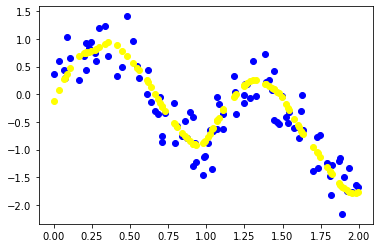

In [197]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, the model tries to fit the locally linear function and that seems better on our dataset.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

As the locally approach worked, we hope that other locally algorithms work either.

KNN is one of these locally algorithms and I think that should work like picewise linear estimation, as we consider a big amount for k.


### Part10:
Implementing the `KNN model`.

In [157]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
            self.k = number_neighbours
            self.X = X
            self.Y = Y

    def distance(self, x1, x2):
        x1 = np.mat(np.array(x1)).T
        x2 = np.mat(np.array(x2)).T
        distance = np.sqrt(np.sum(np.square(x1 - x2),axis = 1)) # implement the distance function
#         print(distance)
        return distance

    def return_nn_ids(self, x):
#         for x in self.X:
        distances = self.distance(x, self.X)
        indices = distances.T.argsort().T[:self.k] # find indices of k nearest neighbours to x
        indices = (np.array(indices.T)[0])
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
#         print(neareest_indices)
        y = np.mat(np.array(self.Y)).T
        predicted_y = y[neareest_indices].mean()
        return predicted_y

In [159]:
model = KNN(3, x_train, y_train)
[model.predict(np.mat(np.array(x_test)).T[3])]

# print([(x) for x in x_test])

[-0.6053047425819011]

In [200]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.linalg.norm(np.mat(predicted_y)-np.mat(y_test)) / np.mat(y_test).shape[1]
    return error, predicted_y

In [201]:
k = 10
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.032795748704587395


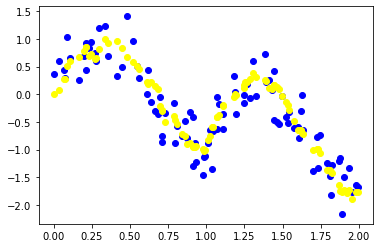

In [202]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, because of average function we use for estimation in KNN alg, we reach a good accurancy in train model(we are eliminating the bias amount in error) and because of the shape of the model, the validation model error have also low amount.
Overall, this algorithm because of the shape of the model(a function) works very well and smoothly.